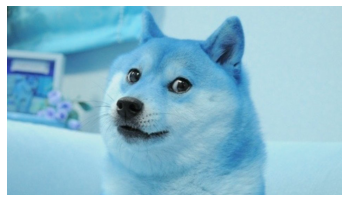

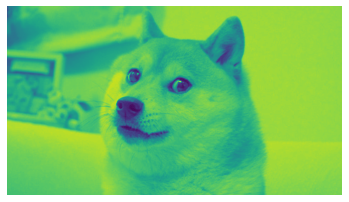

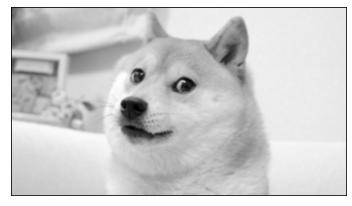

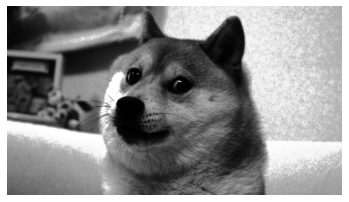

In [25]:
# pip install opencv-python
import cv2
import numpy as np
from matplotlib import pyplot as plt
dogimg = './doge.jpg'
image_gray = cv2.imread(dogimg)
plt.imshow(image_gray), plt.axis('off')
plt.show()

image_gray = cv2.imread(dogimg, cv2.IMREAD_GRAYSCALE)
plt.imshow(image_gray), plt.axis('off')
plt.show()

image_blurry = cv2.blur(image_gray, (5,5)) #블러필터 적용
plt.imshow(image_blurry, cmap='gray'), plt.xticks([]), plt.yticks([])
plt.show()

# histogram을 이용한 동일 이미지 분리
image_enhanced = cv2.equalizeHist(image_gray)
plt.imshow(image_enhanced, cmap='gray'), plt.axis('off')
plt.show()

In [ ]:
import numpy as np
import cv2
cap = cv2.VideoCapture(0) # 캠으로 연결
fourcc = cv2.VideoWriter_fourcc(*'XVID') # 동영상 포맷
out = cv2.VideoWriter('output.avi', fourcc, 20.0, (640,480))
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret==True:
        frame = cv2.flip(frame, 0)
        #write the flipped frame
        out.write(frame)
        cv2.imshow('frame', frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else
        break
cap.release()
out.release()
cv2.destroyAllWindows()


In [36]:
import numpy as np
import cv2
cap = cv2.VideoCapture("testvideo.mp4") # 캠으로 연결
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret==True:
        frame = cv2.flip(frame, 1)
        #write the flipped frame
        cv2.imshow('frame', frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break
cap.release()
cv2.destroyAllWindows()


In [ ]:
#yolo3 동영상 모델 : 이미지학습, 동영상에서 이미지를 잘라서 인식

학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


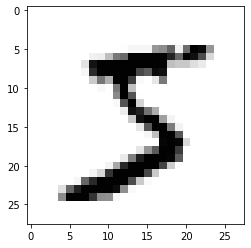

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0 
  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0 
  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0 
  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0   0   0 

In [47]:
#-*- coding: utf-8 -*-

from tensorflow.keras.models import Sequential # Functional, Model class 상속
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical #원핫인코딩

import numpy
import sys
import tensorflow as tf

# seed 값 설정
seed = 0
numpy.random.seed(seed) # numpy ndarray 기반(배열의 이점 : 속도빠름) python : list(느리다)
tf.random.set_seed(3)

# MNIST데이터셋 불러오기
(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data() # 과적합을 확인 (train test validation)

print("학습셋 이미지 수 : %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수 : %d 개" % (X_test.shape[0]))

# 그래프로 확인
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap='Greys')
plt.show()
# 배열로 출력

# 코드로 확인
for x in X_train[0]:#행렬로 구성
    for i in x:
        sys.stdout.write('%3d ' % i)
    sys.stdout.write('\n')

# 차원 변환 과정
X_train = X_train.reshape(X_train.shape[0], 784) # 일렬로
X_train = X_train.astype('float64') # 부동소수점 이미지로 변환 : 정규화
X_train = X_train / 255 
# 체이닝

X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255

#print(X_train[0])

# 클래스 값 확인
print("class : %d " % (Y_class_train[0]))

# 바이너리화 과정
Y_train = to_categorical(Y_class_train, 10)
Y_test = to_categorical(Y_class_test, 10)

print(Y_train[0])


Epoch 00001: val_loss improved from inf to 0.05764, saving model to ./model\01-0.0576.hdf5

Epoch 00002: val_loss improved from 0.05764 to 0.04039, saving model to ./model\02-0.0404.hdf5

Epoch 00003: val_loss improved from 0.04039 to 0.03386, saving model to ./model\03-0.0339.hdf5

Epoch 00004: val_loss improved from 0.03386 to 0.02828, saving model to ./model\04-0.0283.hdf5

Epoch 00005: val_loss did not improve from 0.02828

Epoch 00006: val_loss improved from 0.02828 to 0.02812, saving model to ./model\06-0.0281.hdf5

Epoch 00007: val_loss improved from 0.02812 to 0.02734, saving model to ./model\07-0.0273.hdf5

Epoch 00008: val_loss improved from 0.02734 to 0.02580, saving model to ./model\08-0.0258.hdf5

Epoch 00009: val_loss did not improve from 0.02580

Epoch 00010: val_loss did not improve from 0.02580

Epoch 00011: val_loss improved from 0.02580 to 0.02485, saving model to ./model\11-0.0249.hdf5

Epoch 00012: val_loss did not improve from 0.02485

Epoch 00013: val_loss did n

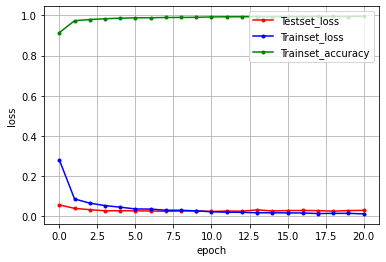

In [58]:
"""
# keras로 만든 FFNN(기본망)
# keras의 모델 구성 순서
    - 모델구성 (Sequential, Functional, Model class 상속)
    - Compile(loss, optimizer, metrics)
    - fit(데이터, epochs, batch_size)
    - evaluate (test 데이터)
    - predict(독립변수만)

"""
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

import matplotlib.pyplot as plt
import os

# 모델 프레임 설정 FFNN
# batch SGD( mini batch )
# model = Sequential()
# model.add(Dense(512, input_dim=784, activation='relu')) # 784x512 + 512
# model.add(Dense(10, activation='softmax')) # ?x512 => 512x10 => ?x10, ?:배치사이즈
# / FFNN

# CNN으로 변경 
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

# 데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

# 컨볼루션 신경망의 설정
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu')) 
# 필터의 개수 28 - 3 + 1 =26 => ?x26x26x32

model.add(Conv2D(64, (3, 3), activation='relu')) # ?x24x24x64
model.add(MaxPooling2D(pool_size=2)) #?x17x17x64
model.add(Dropout(0.25)) #과적합 방지를 위해서 계산 회로를 임의적 줄임
model.add(Flatten()) # ?x(17x17x64)

# FFNN파트
model.add(Dense(128,  activation='relu')) # ?x(17x17x64) * 128 => ?x128
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax')) # ?x128 => 128x10 => ?x10
# /CNN으로 변경 


# 모델 실행 환경 설정
model.compile(loss='categorical_crossentropy', # 2개일때는 binary_crossentropy
              optimizer='adam', # RMSprop + Momentum
              metrics=['accuracy'])

# 모델 최적화 설정 : callbacks 기능 사용하여 모델저장 : 
# 모델은 계속 돌리면 기능이 향상되다 한계를 벗어나면 악화됌 # Bias가 줄어들고 Variance가 늘어나고
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5" # hadoop file 
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True) # validaton 검증
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10) # 과적합방지 #10연속 악화되면 중지

# 모델의 실행 # test데이터를 검증데이터(validation_data)로 직접지정
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), 
                    epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])

# history 누적정보 = accuracy, loss, val_loss

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

y_acc = history.history['accuracy']

# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')
plt.plot(x_len, y_acc, marker='.', c="green", label='Trainset_accuracy')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
# plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers, initializers, regularizers, metrics

np.random.seed(4)
tf.random.set_seed(4)

# 이미지 증강 : ImageDataGenerator.flow_from_directory
train_datagen = ImageDataGenerator(rescale=1./255,
                                  horizontal_flip=True,     #수평 대칭 이미지를 50% 확률로 만들어 추가합니다.
                                  width_shift_range=0.1,  #전체 크기의 10% 범위에서 좌우로 이동합니다.
                                  height_shift_range=0.1, #마찬가지로 위, 아래로 이동합니다.
                                  #rotation_range=5,
                                  #shear_range=0.7,
                                  #zoom_range=[0.9, 2.2],
                                  #vertical_flip=True,
                                  fill_mode='nearest') 

# flow(메모리에 있는 데이터), flow_from_directory(파일)
train_generator = train_datagen.flow_from_directory(#로딩하면서 이미지데이터를 증강
       './train',   #학습셋이 있는 폴더의 위치입니다.
       target_size=(150, 150), # 이미지 사이즈 학습에 적당한 크기로 변경
       batch_size=5,
       class_mode='binary')

#테스트 셋은 이미지 부풀리기 과정을 진행하지 않습니다.
test_datagen = ImageDataGenerator(rescale=1./255)  

test_generator = test_datagen.flow_from_directory(
       './test',   #테스트셋이 있는 폴더의 위치입니다.
       target_size=(150, 150),
       batch_size=5,
       class_mode='binary')

test_generator.image_shape

Found 160 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


(150, 150, 3)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
30/30 [==============================] - 2s 57ms/step - loss: 0.7010 - accuracy: 0.4800 - val_loss: 0.6753 - val_accuracy: 0.6200
Epoch 2/20
30/30 [==============================] - 2s 56ms/step - loss: 0.6948 - accuracy: 0.4800 - val_loss: 0.6851 - val_accuracy: 0.5000
Epoch 3/20
30/30 [==============================] - 1s 46ms/step - loss: 0.6894 - accuracy: 0.5200 - val_loss: 0.6797 - val_accuracy: 0.6000
Epoch 4/20
30/30 [==============================] - 1s 46ms/step - loss: 0.6731 - accuracy: 0.5867 - val_loss: 0.6757 - val_accuracy: 0.5400
Epoch 5/20
30/30 [==============================] - 1s 44ms/step - loss: 0.6976 - accuracy: 0.5200 - val_loss: 0.6720 - val_accuracy: 0.5800
Epoch 6/20
30/30 [==============================] - 1s 44ms/step - loss: 0.6685 - accuracy: 0.6467 - val_loss: 0.6423 - val_accuracy: 0.8400
Epoch 7/20
30/30 [==============================] - 1s 46ms/step - loss: 0.654

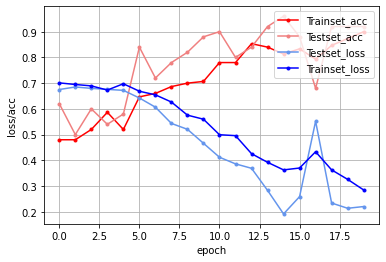

In [3]:
# 앞서 배운 CNN 모델을 만들어 적용해 보겠습니다.
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150,150,3))) # 3 컬러로 읽겠다
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# DCNN
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# FFNN
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2)) # 0, 1
model.add(Activation('softmax'))

#모델을 컴파일 합니다. 

optimizer='Adam'
lr='0.0002'
opt = eval('tf.keras.optimizers.{}(lr={})'.format(optimizer, lr))

model.compile(loss='sparse_categorical_crossentropy', 
#               optimizer=optimizers.Adam(learning_rate=0.0002), 
              optimizer=opt,
              metrics=['accuracy'])


#모델을 실행합니다
history = model.fit_generator( # evaluate는 eavluate_generator, predict_generator 파일기반 학습할때
       train_generator,
       steps_per_epoch=30, # 5x100
       epochs=20,
       validation_data=test_generator,
       validation_steps=10)

#결과를 그래프로 표현하는 부분입니다.
acc= history.history['accuracy']
val_acc= history.history['val_accuracy']
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))  
plt.plot(x_len, acc, marker='.', c="red", label='Trainset_acc')
plt.plot(x_len, val_acc, marker='.', c="lightcoral", label='Testset_acc')
plt.plot(x_len, y_vloss, marker='.', c="cornflowerblue", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right') 
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss/acc')
plt.show()

In [ ]:
"""
오후 시작 ===========================================================================================================================================================================================================
"""

In [ ]:
"""
문제
mnist 데이터에 대하여 cnn deeplearning 모델을 구성하였다. 이 모델에 대하여 learning-rate와 optimizer에 대하여 
parameter tuning을 하고자 한다. 이를 구현하시오
- 평가자 리스트
- gridsearchcv를 이해하고 있는가
- gridsearchcv를 keras model에 적용할수 있는가
- gridsearchcv의 매개변수 종류를 이해하고 있는가
- pipeline과 연결해서 작업의 편리를 도모할수 있는가
- optimization의 대한 파라미터 대상을 알고있는가
""" 


In [ ]:
# 문제 -실습
# 1. iris.csv 데이터 로딩
# 2. 2개 레이어로 구성된 keras Sequential model을 구성하시오 , target 3개로 분류
# 3. KerasClassifier를 구성하시오
# 4. KFold는 10개로 split하여 shuffle=True로 데이터를 준비
# 5. cross_val_score로 정확도가 몇%인지 확인
# 6. SGD, Adam 옵티마이저에 대하여 hyper parameter tuning을 실시
